# Avacado Project

## Problem Statement:


Avocado is a fruit consumed by people heavily in the United States. 
Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
Avacado = pd.read_csv('/Users/abhaysolanki/Downloads/avocado.csv')

In [3]:
Avacado.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [4]:
pd.set_option('display.max_column',None)

In [5]:
Avacado.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
Avacado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
Avacado.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
Avacado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# This problem requires to work on prediction of price and prediction the origin which means it will take regression for price prediction and classification for the Region. So, we use Regression and classification both in differrent times, at first Price Prediction will be completed. 

# EDA

In [9]:
Avacado.shape

(18249, 13)

# Checking for the null Values

In [10]:
Avacado.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no null values present in the dataset.

<AxesSubplot:>

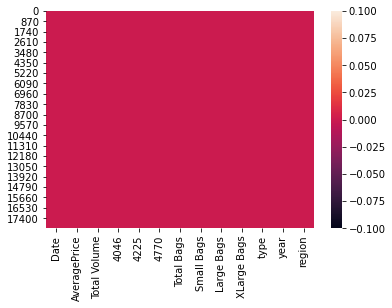

In [11]:
# Checking from the heat map

sns.heatmap(data=Avacado.isnull())

In [12]:
Avacado.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [13]:
# we will data column as well because it is not giving any insights 

Avacado.drop('Date', axis=1, inplace=True)

In [14]:
Avacado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [15]:
Avacado['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

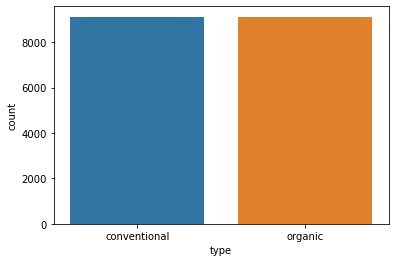

In [16]:
sns.countplot(x=Avacado['type'])

In terms of type the data is homogenous because conentional and organic avacados are same in quantity.

In [17]:
Avacado['region'].nunique()

54

In [18]:
Avacado['region'].value_counts()


GreatLakes             338
Jacksonville           338
Plains                 338
SanDiego               338
Columbus               338
BuffaloRochester       338
StLouis                338
California             338
BaltimoreWashington    338
Orlando                338
Southeast              338
Spokane                338
Roanoke                338
Louisville             338
Portland               338
Nashville              338
SouthCentral           338
Houston                338
Syracuse               338
Seattle                338
PhoenixTucson          338
SouthCarolina          338
Boston                 338
Midsouth               338
Philadelphia           338
Boise                  338
Pittsburgh             338
MiamiFtLauderdale      338
NewOrleansMobile       338
LosAngeles             338
West                   338
LasVegas               338
Detroit                338
SanFrancisco           338
HartfordSpringfield    338
RichmondNorfolk        338
TotalUS                338
D

There are 54 different region from where avacado is taken.

<AxesSubplot:xlabel='AveragePrice', ylabel='year'>

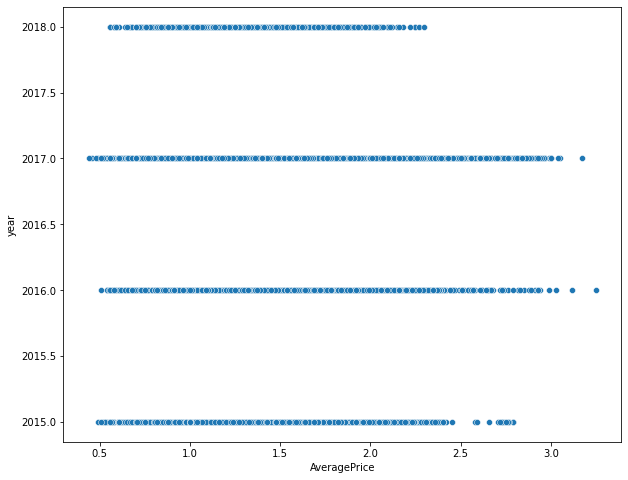

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=Avacado['AveragePrice'], y=Avacado['year'])

it is clearly seen that the average price was remain unchanged becuse of the year

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

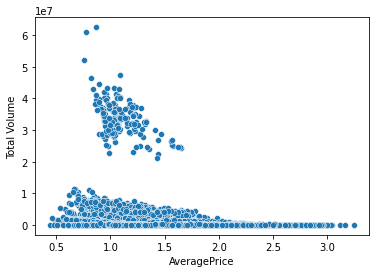

In [20]:
sns.scatterplot(x='AveragePrice', y='Total Volume' , data=Avacado)

the data is ambigous and not showing any other relation between the price and volume

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Bags'>

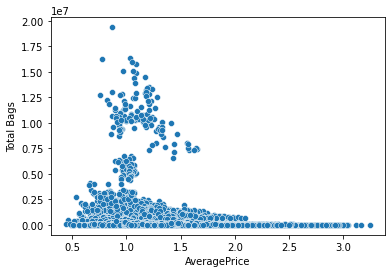

In [21]:
sns.scatterplot(data=Avacado, x='AveragePrice', y ='Total Bags')

Data is not showing any correlation between price and total bags

<AxesSubplot:xlabel='AveragePrice', ylabel='Large Bags'>

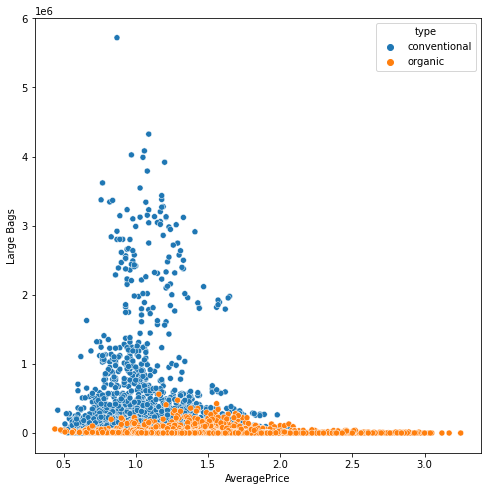

In [22]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=Avacado, x='AveragePrice', y='Large Bags', hue='type')

most of the large bags has been selling between 0.5 to 2.0

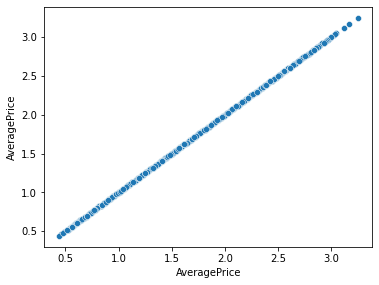

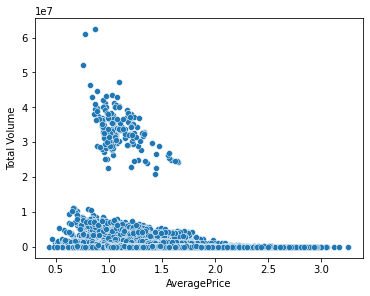

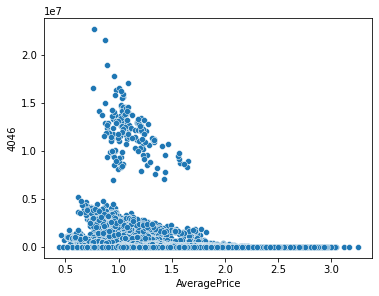

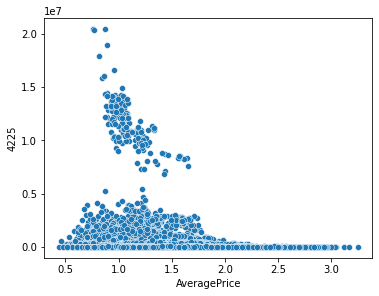

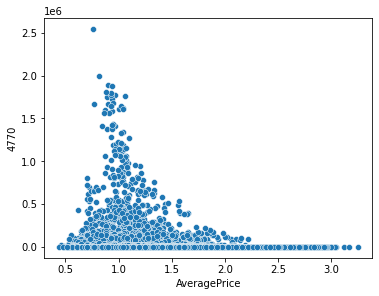

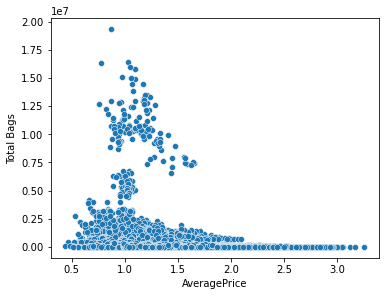

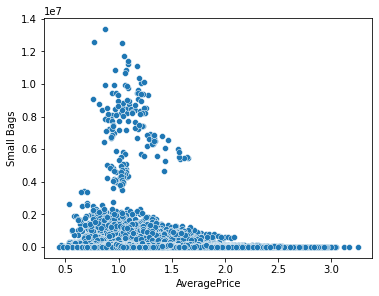

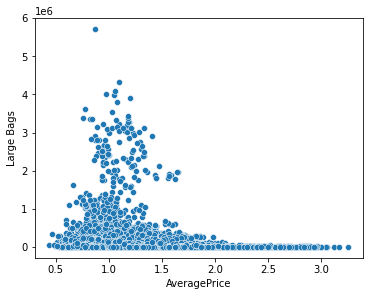

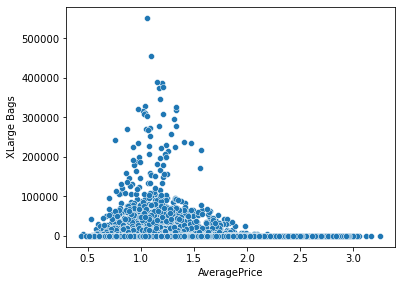

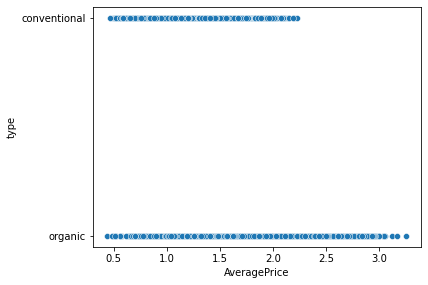

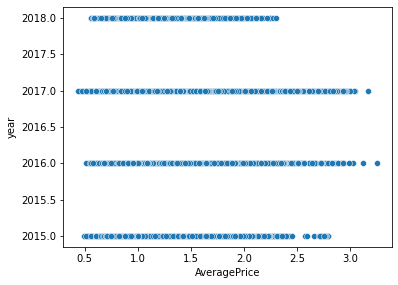

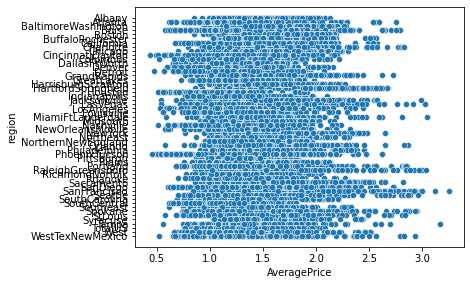

In [23]:
for i in Avacado.columns:
    plt.figure(figsize=(20,15))
    plt.subplot(3,3,9)
    sns.scatterplot(x='AveragePrice', y=i, data=Avacado)

# As the recent analysis it is clearly seen that label does not have any good relation with any other features.

<AxesSubplot:xlabel='year', ylabel='count'>

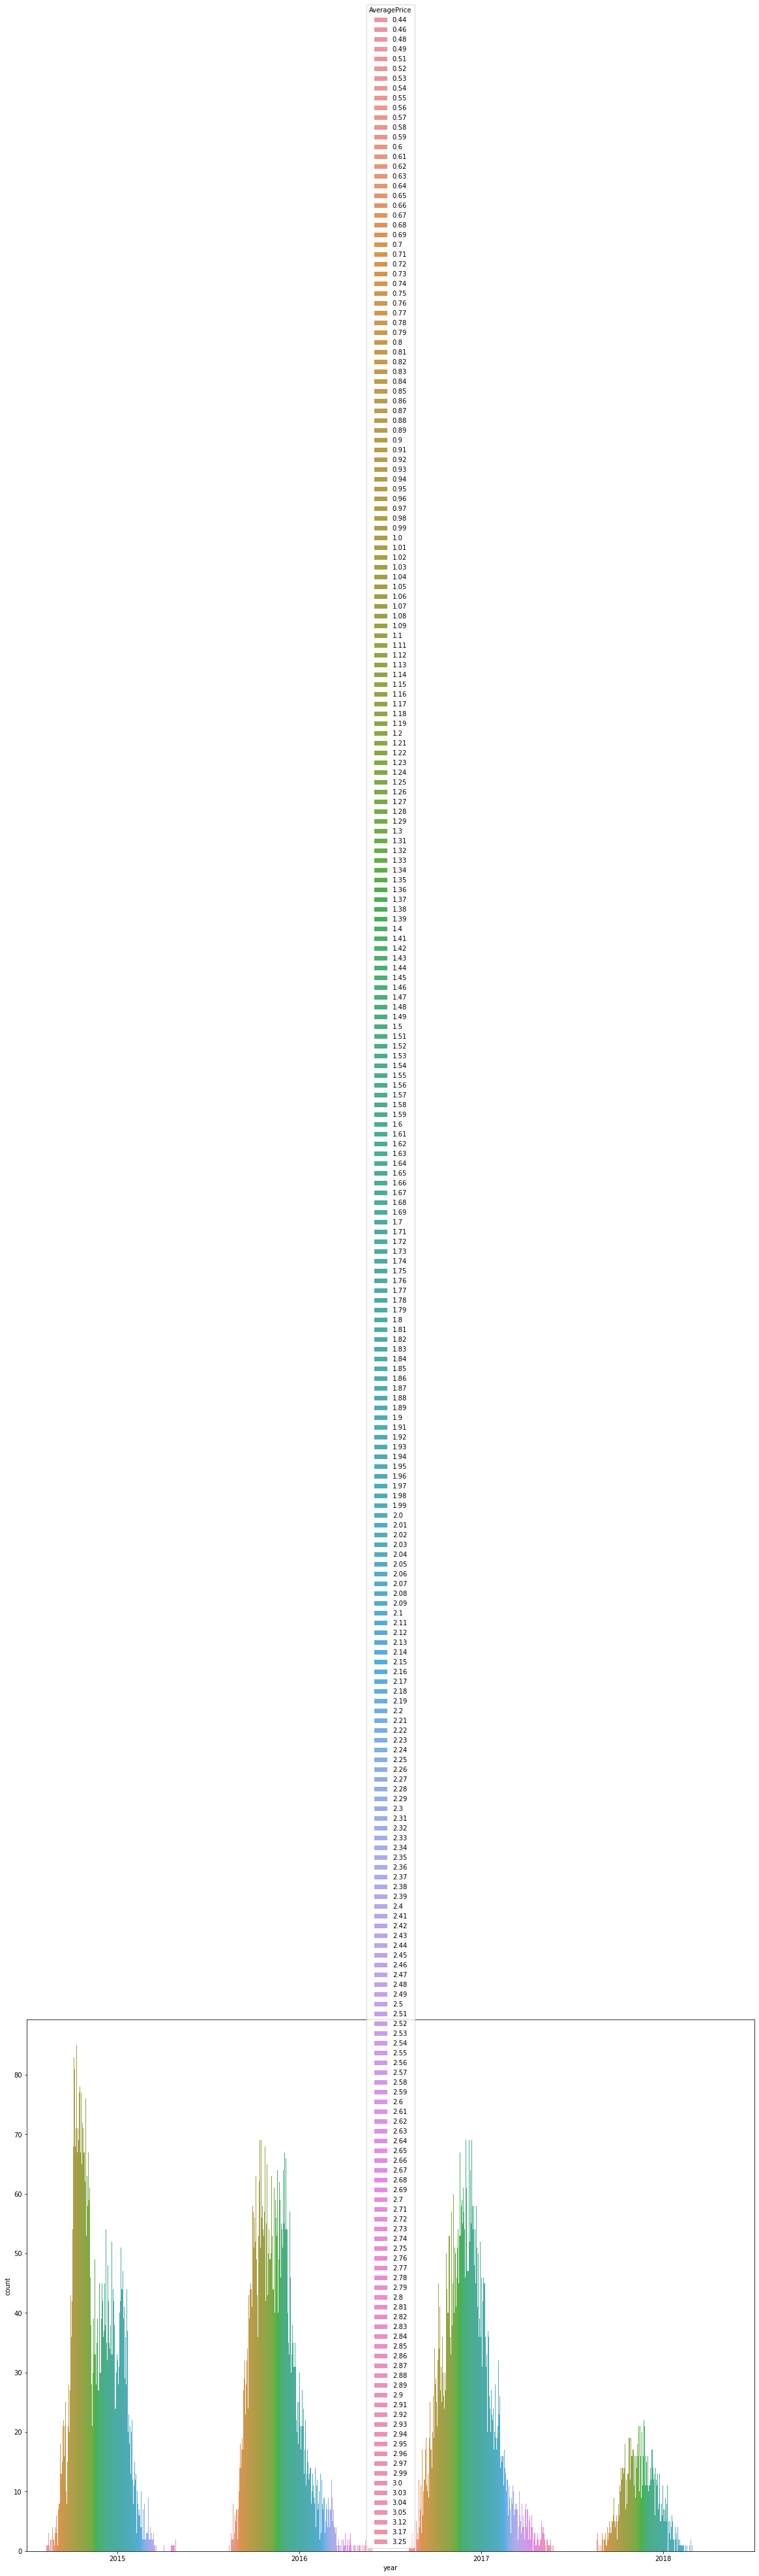

In [24]:
plt.figure(figsize=(20,15))
sns.countplot(x='year',hue='AveragePrice',data=Avacado, )

The price of avacado was more in 2015 but as the year changed it started to fall.

# checking for discription

In [25]:
round(Avacado.describe(),2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15
std,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94
min,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00
50%,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00
75%,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00
max,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00


In every column except year, the difference between 75% and max is very high which means the outliers are present in most of the columns.

In every column except year, the std is very high which also elaborate that skewness is also there.

<AxesSubplot:>

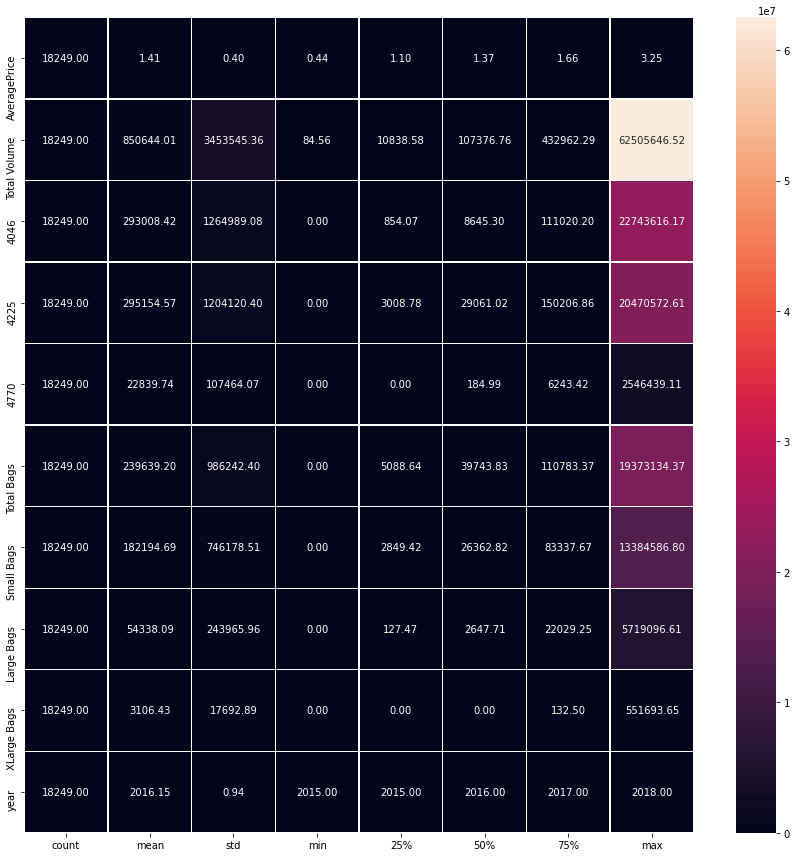

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(Avacado.describe().transpose(), annot=True, linecolor='white', linewidths=0.3, fmt='0.2f')

From above we are determining mean, standard deviation, min. and max. value of each column, which will furthur help in data cleaning.

Total number of rows and columns in dataset:

1.18249 rows

2.12 columns

Total volume:

1.Mean=850644.01

2.std=3453545.36

3.max_value=62505646.52

4.min_value=84.56

4046:

1.Mean=293008.42

2.std=1264989.08

3.max_value=22743616.17

4.min_value=0.00

4225:

1.Mean=295154.57

2.std=1204120.40

3.max_value=20470572.61

4.min_value=0.00

4770:

1.Mean=22839.74

2.std=107464.07

3.max_value=2546439.11

4.min_value=0.00

Total Bags:

1.Mean=239639.20

2.std=986242.40

3.max_value=19373134.37

4.min_value=0.00

Small Bags:

1.Mean=182194.69

2.std=746178.51

3.max_value=13384586.80

4.min_value=0.00

Large Bags:

1.Mean=54338.09

2.std=243965.96

3.max_value=5719096.61

4.min_value=0.00

XLarge Bags:

1.Mean=3106.43

2.std=17692.89

3.max_value=551693.65

4.min_value=0.00

year:

1.Mean=2016.15

2.std=0.94

3.max_value=2018.00

4.min_value=2015.00

AveragePrice:

1.Mean=1.41

2.std=0.40

3.max_value=3.25

4.min_value=0.44


In [27]:
# replaceing the type from string to INt

Avacado['type']= Avacado['type'].replace(to_replace=['conventional','organic'],value=(0,1))

As the recent replacement 
conventional=0
organic=1

# checking for outliers

AveragePrice        AxesSubplot(0.125,0.71587;0.168478x0.16413)
Total Volume     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4225             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4770               AxesSubplot(0.125,0.518913;0.168478x0.16413)
Total Bags      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Small Bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Large Bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
XLarge Bags        AxesSubplot(0.125,0.321957;0.168478x0.16413)
type            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
year            AxesSubplot(0.529348,0.321957;0.168478x0.16413)
dtype: object

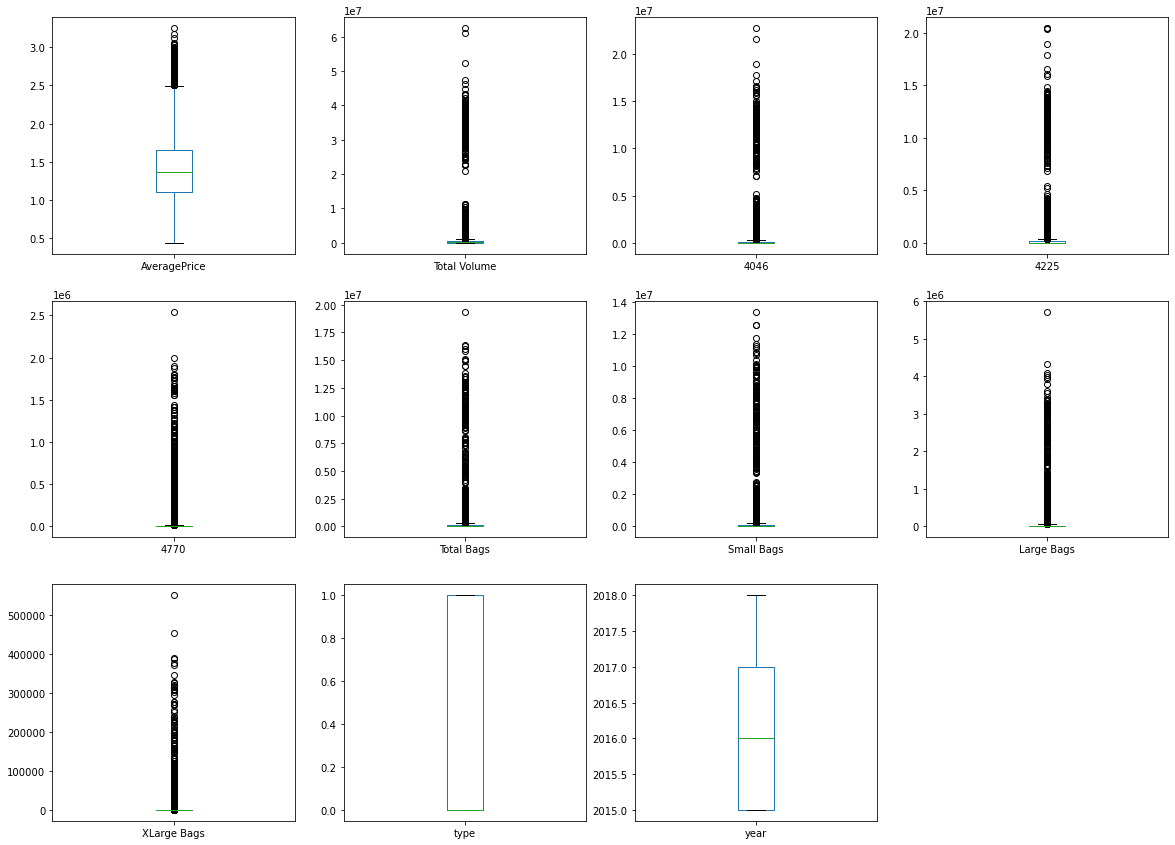

In [28]:
Avacado.plot(kind='box', subplots=True, figsize=(20,20), layout=(4,4))

As is seen the outliers are present in almost every column which are listed below:
AveragePrice

Total Volume

4046 

4225

4770

Total Bags 

Small Bags

Large Bags 

XLarge Bags

    

# Checking for the correaltion

In [29]:
Avacado.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032


<AxesSubplot:>

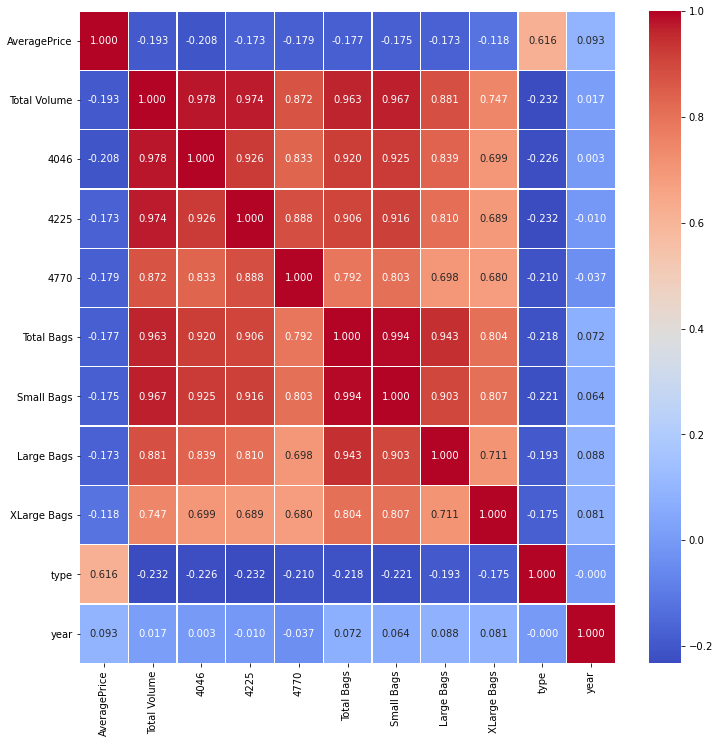

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(Avacado.corr(),linecolor='white', linewidths=0.3, fmt='0.3f', cmap='coolwarm', annot=True)

insights:
~ Average price is showing the highest correlaion with type(0.616)

~ All the other factors are showing negative correlation with Average price

~All the plu(4046,4225,4770) are showing high correlation with Average price.

~ Small bags and total bags are also highely correlated.


# Checking for the skewness

In [31]:
Avacado.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
dtype: float64

While considering threshold of +/- 0.5 there are some columns where skewness is present.

Total Volume

4046

4225

4770

Total Bags 

Small Bags

Large Bags

X large Bage

<AxesSubplot:ylabel='Density'>

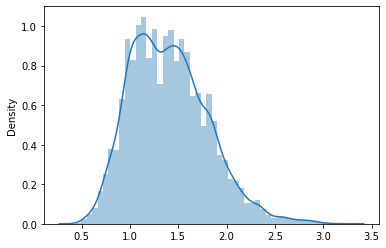

In [32]:
sns.distplot(x=Avacado['AveragePrice'], kde=True)

skewness is low in this column.

<AxesSubplot:ylabel='Density'>

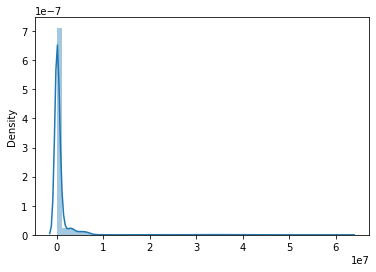

In [33]:
sns.distplot(x=Avacado['Total Volume'], kde=True)

<AxesSubplot:ylabel='Density'>

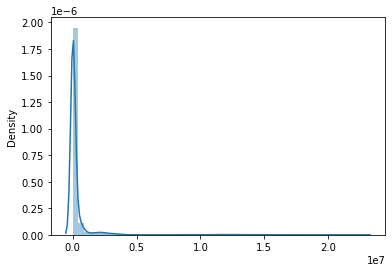

In [34]:
sns.distplot(x= Avacado['4046'])

Skewness is present in this column.

<AxesSubplot:ylabel='Density'>

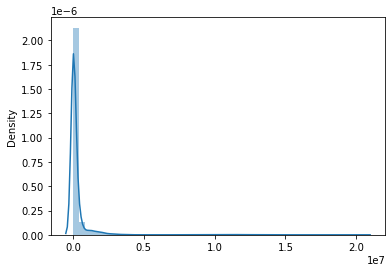

In [35]:
sns.distplot(x=Avacado['4225'])

skewness is present is this column

<AxesSubplot:xlabel='4770', ylabel='Density'>

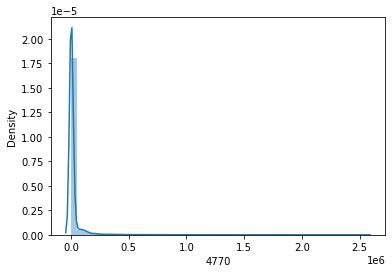

In [36]:
sns.distplot(Avacado['4770'])

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

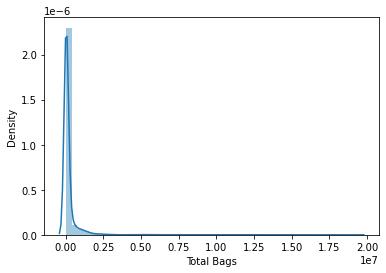

In [37]:
sns.distplot(Avacado['Total Bags'])

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

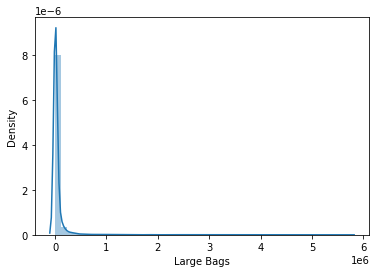

In [38]:
sns.distplot(Avacado['Large Bags'])

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

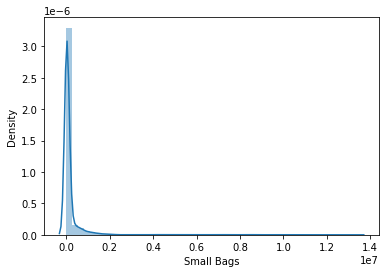

In [39]:
sns.distplot(Avacado['Small Bags'])

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

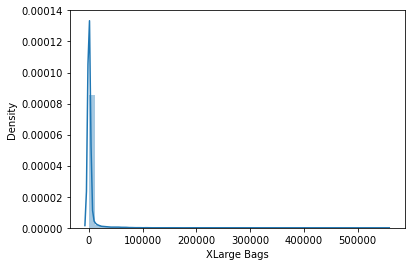

In [40]:
sns.distplot(Avacado['XLarge Bags'])

# Clearing Multicolinearity

In [41]:
Avacado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany


## Label Encoding will be used before Outlier removal

In [42]:
# calling for the label encoder

from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

for i in Avacado.columns:
    if Avacado[i].dtypes=='object':
        Avacado[i]=le.fit_transform(Avacado[i].values.reshape(-1,1))

In [43]:
Avacado.sample(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16347,1.68,16452.15,4.84,169.28,0.00,16278.03,16278.03,0.00,0.00,1,2017,30
17674,1.75,202790.74,29398.11,70514.05,8.08,102870.50,102717.50,153.00,0.00,1,2018,6
829,1.08,3006207.02,401683.43,1650327.26,257105.89,697090.44,600155.95,93434.54,3499.95,0,2015,15
2166,0.80,740760.30,424263.68,247709.36,14408.91,54378.35,50153.42,4224.93,0.00,0,2015,41
6376,1.74,112023.41,1978.65,45102.68,25971.21,38970.87,26953.30,3478.91,8538.66,0,2017,14
2557,1.26,48971.60,935.77,30448.48,18.45,17568.90,16893.34,675.56,0.00,0,2015,49
3311,0.94,218247.37,4307.62,141433.59,9484.48,63021.68,19112.22,41934.57,1974.89,0,2016,9
17952,1.65,313200.35,38734.87,90401.71,108.65,183955.12,168196.82,15758.30,0.00,1,2018,29
17134,1.69,99714.13,20163.60,2648.96,0.00,76901.57,74677.27,2224.30,0.00,1,2017,45
15981,1.73,3557.10,0.00,1226.78,0.00,2330.32,729.74,1600.58,0.00,1,2017,23


In [44]:
x= Avacado.drop('AveragePrice', axis=1)

In [45]:
# importing the variance inflation factore

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
def calculate_vif():
    vif= pd.DataFrame()
    vif['Columns']= x.columns
    vif['Number']= [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    print(vif)

In [47]:
calculate_vif()

         Columns        Number
0   Total Volume  5.212294e+09
1           4046  6.946814e+08
2           4225  6.332813e+08
3           4770  4.973250e+06
4     Total Bags  2.502000e+14
5     Small Bags  1.429714e+14
6     Large Bags  1.521486e+13
7    XLarge Bags  7.855572e+10
8           type  2.123029e+00
9           year  5.050744e+00
10        region  4.160407e+00


# Based on the current analysis we will drop Smallbags, LargeBags,XLargeBags.

In [48]:
Avacado.drop(['Small Bags','Large Bags','XLarge Bags'] , axis=1, inplace=True)

In [49]:
# calling for zscore for outlier removal

from scipy.stats import zscore
z = np.abs(zscore(Avacado))


In [50]:
threshold =3

print(np.where(z>3))


(array([  346,   359,   783, ..., 17304, 17402, 17428]), array([2, 2, 4, ..., 0, 0, 0]))


In [51]:
Avacado_new= Avacado[(z<3).all(axis=1)]

In [52]:
print(Avacado.shape)
print(Avacado_new.shape)

(18249, 9)
(17823, 9)


In [53]:
# percenatge of Data loss

Data_loss=((18249-17651)/18249)*100
Data_loss

3.276891884486821

As the pecent age of Data loss is less than 5% so we will drop the data.

# Skweness Removal

In [54]:
# before skewness removal we will devide the data

x1= Avacado_new.drop('AveragePrice', axis=1)     # for regression purpose
y1=Avacado_new['AveragePrice']


x2= Avacado_new.drop('region', axis=1)
y2= Avacado_new['region']                          # for classification preblem

In [55]:
print(x1.shape)
print(y1.shape)

print(x2.shape)
print(y2.shape)

(17823, 8)
(17823,)
(17823, 8)
(17823,)


In [56]:
Avacado_new.head(10)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0,2015,0
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,0,2015,0
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,0,2015,0
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,0,2015,0
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,0,2015,0
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,0,2015,0


In [57]:
# skewness removal 

# for skewness removal we will call power tranform method

from sklearn.preprocessing import power_transform
x1= power_transform(x1)
x1

array([[-0.08824312, -0.66461272,  0.33149987, ..., -1.00907444,
         0.        , -2.01115114],
       [-0.15946921, -0.78340444,  0.25079502, ..., -1.00907444,
         0.        , -2.01115114],
       [ 0.18844774, -0.73835368,  0.62469139, ..., -1.00907444,
         0.        , -2.01115114],
       ...,
       [-0.78125419, -0.62550412, -0.78564355, ...,  0.99100716,
         0.        ,  1.56702242],
       [-0.70826868, -0.55520364, -0.72363413, ...,  0.99100716,
         0.        ,  1.56702242],
       [-0.67410164, -0.36979653, -0.79829928, ...,  0.99100716,
         0.        ,  1.56702242]])

In [58]:
x2 = power_transform(x2)
x2

array([[-0.1073937 , -0.08824312, -0.66461272, ..., -0.54067732,
        -1.00907444,  0.        ],
       [-0.05393955, -0.15946921, -0.78340444, ..., -0.50173732,
        -1.00907444,  0.        ],
       [-1.28995034,  0.18844774, -0.73835368, ..., -0.56923841,
        -1.00907444,  0.        ],
       ...,
       [ 1.19108372, -0.78125419, -0.62550412, ..., -0.50691442,
         0.99100716,  0.        ],
       [ 1.31938795, -0.70826868, -0.55520364, ..., -0.43856682,
         0.99100716,  0.        ],
       [ 0.62467099, -0.67410164, -0.36979653, ..., -0.3981718 ,
         0.99100716,  0.        ]])

# standard scaler

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
sc= StandardScaler()    # for Regression problem
sc.fit_transform(x1)
x1

array([[-0.08824312, -0.66461272,  0.33149987, ..., -1.00907444,
         0.        , -2.01115114],
       [-0.15946921, -0.78340444,  0.25079502, ..., -1.00907444,
         0.        , -2.01115114],
       [ 0.18844774, -0.73835368,  0.62469139, ..., -1.00907444,
         0.        , -2.01115114],
       ...,
       [-0.78125419, -0.62550412, -0.78564355, ...,  0.99100716,
         0.        ,  1.56702242],
       [-0.70826868, -0.55520364, -0.72363413, ...,  0.99100716,
         0.        ,  1.56702242],
       [-0.67410164, -0.36979653, -0.79829928, ...,  0.99100716,
         0.        ,  1.56702242]])

In [61]:
sc= StandardScaler()
sc.fit_transform(x2)
x2

array([[-0.1073937 , -0.08824312, -0.66461272, ..., -0.54067732,
        -1.00907444,  0.        ],
       [-0.05393955, -0.15946921, -0.78340444, ..., -0.50173732,
        -1.00907444,  0.        ],
       [-1.28995034,  0.18844774, -0.73835368, ..., -0.56923841,
        -1.00907444,  0.        ],
       ...,
       [ 1.19108372, -0.78125419, -0.62550412, ..., -0.50691442,
         0.99100716,  0.        ],
       [ 1.31938795, -0.70826868, -0.55520364, ..., -0.43856682,
         0.99100716,  0.        ],
       [ 0.62467099, -0.67410164, -0.36979653, ..., -0.3981718 ,
         0.99100716,  0.        ]])

In [62]:
# for regression
x=x1
x

array([[-0.08824312, -0.66461272,  0.33149987, ..., -1.00907444,
         0.        , -2.01115114],
       [-0.15946921, -0.78340444,  0.25079502, ..., -1.00907444,
         0.        , -2.01115114],
       [ 0.18844774, -0.73835368,  0.62469139, ..., -1.00907444,
         0.        , -2.01115114],
       ...,
       [-0.78125419, -0.62550412, -0.78564355, ...,  0.99100716,
         0.        ,  1.56702242],
       [-0.70826868, -0.55520364, -0.72363413, ...,  0.99100716,
         0.        ,  1.56702242],
       [-0.67410164, -0.36979653, -0.79829928, ...,  0.99100716,
         0.        ,  1.56702242]])

In [63]:
# for classification
y=y1
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17823, dtype: float64

# We will be using X and  Y for regression for prediction the future price of Avacado so we are taking price as our output.

In [64]:
# importing models

from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Finding the optimum random state

In [65]:
Maxaccuracy=0
Maxrs=0

for i in range(1,500):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20, random_state=i)
    lr= LinearRegression()
    lr.fit(train_x,train_y)
    pred_lr= lr.predict(test_x)
    accuracy= r2_score(test_y,pred_lr)
    if accuracy>Maxaccuracy:
        Maxaccuracy=accuracy
        Maxrs=i
        
print('the r2score of the model is ',Maxaccuracy, 'at random state of ',Maxrs)

the r2score of the model is  0.48441037927338526 at random state of  152


# The best accuracy is 48% at 152 random state.

In [66]:
train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=0.20,random_state=152)

In [67]:
print(train_x.shape)
print(test_x.shape)

(14258, 8)
(3565, 8)


In [68]:
print(train_y.shape)
print(test_y.shape)

(14258,)
(3565,)


## Checking the different model

In [69]:
lr =LinearRegression()
sg = SGDRegressor()
dt= DecisionTreeRegressor()
et= ExtraTreeRegressor()
rf= RandomForestRegressor()
ar= AdaBoostRegressor()
gb= GradientBoostingRegressor()
svr= SVR()
knr= KNeighborsRegressor()
br =BaggingRegressor()

models= [lr,sg,dt,et,rf,ar,gb,svr,knr,br]
for i in models:
    i.fit(train_x,train_y)
    pred_i= i.predict(test_x)
    print('==========================',i,'=============================')
    print('the train score of ',i,'is',i.score(train_x,train_y))
    print('the test score of ', i , 'is', i.score(test_x,test_y))
    print('the r2 score of ', i , 'is ', r2_score(test_y,pred_i))
    print('/n')

========================== LinearRegression() =============================
the train score of  LinearRegression() is 0.4449871697139982
the test score of  LinearRegression() is 0.48441037927338526
the r2 score of  LinearRegression() is  0.48441037927338526
/n
========================== SGDRegressor() =============================
the train score of  SGDRegressor() is 0.44295810735023033
the test score of  SGDRegressor() is 0.48097093954334647
the r2 score of  SGDRegressor() is  0.48097093954334647
/n
========================== DecisionTreeRegressor() =============================
the train score of  DecisionTreeRegressor() is 1.0
the test score of  DecisionTreeRegressor() is 0.5854634775934383
the r2 score of  DecisionTreeRegressor() is  0.5854634775934383
/n
========================== ExtraTreeRegressor() =============================
the train score of  ExtraTreeRegressor() is 1.0
the test score of  ExtraTreeRegressor() is 0.6132983182104388
the r2 score of  ExtraTreeRegressor() is 

## As per the observation the best working model The RandomForestRegressor with having highest accuracy of 80.48% is followed by Kneighborregressor having accuracy is 80.46%.

# Checking for the Cross validation 

In [70]:
from sklearn.model_selection import cross_val_score
models= [lr,sg,dt,et,rf,ar,gb,svr,knr,br]

for m in models:
    cross_val_m=cross_val_score(m,x,y,cv=5)
    print('the cross validation score of ', m, 'is',cross_val_m.mean()*100)
    print('the  r2score of' , m, 'is', r2_score(test_y,pred_i)*100 )
    print('\n')

the cross validation score of  LinearRegression() is -2.6590687265433877
the  r2score of LinearRegression() is 77.75070601210668


the cross validation score of  SGDRegressor() is -3.4295944331491786
the  r2score of SGDRegressor() is 77.75070601210668


the cross validation score of  DecisionTreeRegressor() is -63.52127266662579
the  r2score of DecisionTreeRegressor() is 77.75070601210668


the cross validation score of  ExtraTreeRegressor() is -44.44065359586554
the  r2score of ExtraTreeRegressor() is 77.75070601210668


the cross validation score of  RandomForestRegressor() is 2.1771260164606154
the  r2score of RandomForestRegressor() is 77.75070601210668


the cross validation score of  AdaBoostRegressor() is -8.24792993144613
the  r2score of AdaBoostRegressor() is 77.75070601210668


the cross validation score of  GradientBoostingRegressor() is 9.12399956232422
the  r2score of GradientBoostingRegressor() is 77.75070601210668


the cross validation score of  SVR() is -12.50938339431

## As RandomForestRegressor is giving highest R2score and having least difference between r2score and cross validation score so this will be out model.

# Hyperparmater Tunning.

In [71]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [72]:
parameter={"max_depth":np.arange(2,10), 
           "criterion":["mse"],
          "min_samples_split":[8,10,12],
          "n_estimators":np.arange(2,10),
          "min_samples_leaf":[3,4,5]}

In [73]:
GCV= GridSearchCV(RandomForestRegressor(),parameter,cv=5)
GCV.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [74]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 9}

In [75]:
# checking the accuracy of the best parameters

pred_gcv= GCV.best_estimator_.predict(test_x)

print('the final accuracy is :', r2_score(test_y,pred_gcv))



the final accuracy is : 0.7083951965556756


# the final accuracy is 71.11%.

# Now we will treat the region column as our label and classification method will be used for further prediction.

In [76]:


# importing the models
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


# Finding the optimum random state:

In [77]:
Maxaccu=0
Maxrs=0

for a in range (0,200):
    train_x2,test_x2,train_y2,test_y2= train_test_split(x2,y2,test_size=0.20, random_state=a)
    lr= LogisticRegression()
    lr.fit(train_x2,train_y2)
    pred_lr= lr.predict(test_x2)
    accuracy=(accuracy_score(test_y2,pred_lr))
    if  accuracy > Maxaccu:
        Maxaccu=accuracy
        Maxrs=a
        
print('the best accuracy is', Maxaccu,'at random state ', Maxrs)

the best accuracy is 0.4356241234221599 at random state  179


In [78]:
train_x2,test_x2,train_y2,test_y2=train_test_split(x2,y2,test_size=0.20, random_state=179)

In [79]:
lr = LogisticRegression()
sgd=SGDClassifier()
dtc=DecisionTreeClassifier()
etc =ExtraTreeClassifier()
svc= SVC()
knc=KNeighborsClassifier()
adc= AdaBoostClassifier()
gbc=GradientBoostingClassifier()
bg= BaggingClassifier()
rfc =RandomForestClassifier()

models= [lr,sgd,dtc,etc,svc,knc,adc,gbc,bg,rfc]

for i in models:
    i.fit(train_x2,train_y2)
    pred_i= i.predict(test_x2)
    print('=============',i,'====================')
    print('The accuracy score of',i,'is', accuracy_score(test_y2,pred_i)*100)
    print('The classification report', i ,'is', classification_report(test_y2,pred_i))
    print('the confusion metrix of ', i ,'is', confusion_matrix(test_y2,pred_i))
    

============= LogisticRegression() ====================
The accuracy score of LogisticRegression() is 43.56241234221599
The classification report LogisticRegression() is               precision    recall  f1-score   support

           0       0.69      0.49      0.58        69
           1       0.15      0.29      0.20        51
           2       0.51      0.49      0.50        73
           3       0.46      0.37      0.41        70
           4       0.46      0.48      0.47        69
           5       0.45      0.56      0.50        72
           6       0.51      0.79      0.62        52
           7       0.43      0.71      0.54        63
           8       0.62      0.77      0.69        56
           9       0.48      0.56      0.51        72
          10       0.36      0.21      0.27        70
          11       0.50      0.35      0.41        79
          12       0.21      0.24      0.22        62
          13       0.18      0.05      0.07        66
          14       

============= ExtraTreeClassifier() ====================
The accuracy score of ExtraTreeClassifier() is 66.1711079943899
The classification report ExtraTreeClassifier() is               precision    recall  f1-score   support

           0       0.86      0.70      0.77        69
           1       0.50      0.57      0.53        51
           2       0.74      0.71      0.73        73
           3       0.63      0.66      0.64        70
           4       0.60      0.67      0.63        69
           5       0.68      0.68      0.68        72
           6       0.78      0.90      0.84        52
           7       0.59      0.63      0.61        63
           8       0.81      0.91      0.86        56
           9       0.62      0.64      0.63        72
          10       0.67      0.49      0.56        70
          11       0.69      0.68      0.69        79
          12       0.72      0.58      0.64        62
          13       0.54      0.59      0.57        66
          14     

============= AdaBoostClassifier() ====================
The accuracy score of AdaBoostClassifier() is 6.002805049088359
The classification report AdaBoostClassifier() is               precision    recall  f1-score   support

           0       0.36      0.07      0.12        69
           1       0.02      1.00      0.05        51
           2       0.00      0.00      0.00        73
           3       0.00      0.00      0.00        70
           4       0.00      0.00      0.00        69
           5       0.00      0.00      0.00        72
           6       0.00      0.00      0.00        52
           7       0.00      0.00      0.00        63
           8       0.00      0.00      0.00        56
           9       0.00      0.00      0.00        72
          10       0.00      0.00      0.00        70
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        62
          13       0.00      0.00      0.00        66
          14       

============= RandomForestClassifier() ====================
The accuracy score of RandomForestClassifier() is 84.03927068723702
The classification report RandomForestClassifier() is               precision    recall  f1-score   support

           0       0.94      0.84      0.89        69
           1       0.65      0.67      0.66        51
           2       0.92      0.95      0.93        73
           3       0.86      0.84      0.85        70
           4       0.88      0.91      0.89        69
           5       0.83      0.72      0.77        72
           6       0.96      0.96      0.96        52
           7       0.80      0.84      0.82        63
           8       0.95      0.98      0.96        56
           9       0.85      0.88      0.86        72
          10       0.77      0.76      0.76        70
          11       0.86      0.86      0.86        79
          12       0.91      0.81      0.85        62
          13       0.72      0.80      0.76        66
       

## As the DecesionTreeClssifier is giving the highest accuracy score among all other model whilt having accuracy score of 84.31%.

# checking for the Cross validation score.

In [80]:
from sklearn.model_selection import cross_val_score
model=[lr,sgd,dtc,etc,svc,knc,adc,bg,rfc]
for i in models:
    cross_val= cross_val_score(i,x2,y2,cv=5)
    print('The cross vaildation score of ',i, 'is', cross_val.mean())

The cross vaildation score of  LogisticRegression() is 0.30887045615890873
The cross vaildation score of  SGDClassifier() is 0.15693352411444977
The cross vaildation score of  DecisionTreeClassifier() is 0.520835879442705
The cross vaildation score of  ExtraTreeClassifier() is 0.4382471119170511
The cross vaildation score of  SVC() is 0.5553425953472704
The cross vaildation score of  KNeighborsClassifier() is 0.58198969593079
The cross vaildation score of  AdaBoostClassifier() is 0.05145021982329136
The cross vaildation score of  GradientBoostingClassifier() is 0.5600535037140928
The cross vaildation score of  BaggingClassifier() is 0.5825519650297584
The cross vaildation score of  RandomForestClassifier() is 0.6178996447252642


# As the RandomforestClassifier is showing the highest cross validation score so that will be the final model with having accuray of 84.31%. 

In [81]:
# Saving the model 

import joblib
joblib.dump(rfc, 'Avacado_classification_model.pk1')

['Avacado_classification_model.pk1']